In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

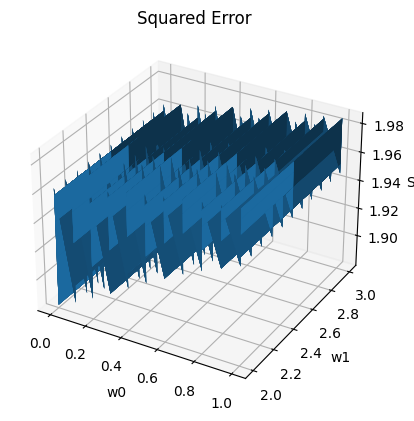

In [3]:
#The data in the project is given by small matrix, thus we initialise it manualy.
#'f8' stands for 64-bit float.

data_input = np.array([(1.0, 1.3, 2.6, 0),
                       (2.2, 1.1, 1.2, 1),
                       (2.0, 2.4, 3.8, 1),
                       (1.5, 3.2, 2.1, 0),
                       (3.2, 1.2, 4.2, 1)],
                       dtype = {'names': ('A','B','C','Y'),
                                'formats': ('f8','f8','f8','i8')})

#define w_0 and w_1 weights

input_weights_w_0 = np.linspace(0, 1, 11)
input_weights_w_1 = np.linspace(2, 3, 11)

#define A, B, Y and B, C, Y matrices fro the input

data_A_B_Y = data_input[['A', 'B', 'Y']].copy()
data_B_C_Y = data_input[['B', 'C', 'Y']].copy()

#define the MSE_matrix which has in the row (w_0, w_1, MSE(w0,w1))

MSE_matrix_A_B = []  
MSE_matrix_B_C = []

for i in input_weights_w_0:
    for j in input_weights_w_1:
        
        #define model function 
        
        M = lambda x_0, x_1 : 1 / (1 + np.exp(-(i*x_0 + j*x_1)))
        
        #define helper variables for the MSE count for fixed weights w_0 and w_1
        local_variable1 = 0
        local_variable2 = 0
        
        #loop for A, B, Y data
        
        for z in data_A_B_Y:
            local_variable1 += (z[2] - M(z[0], z[1]))**2
        
        #loop for B, C, Y data
        
        for z in data_B_C_Y:
            local_variable2 += (z[2] - M(z[0], z[1]))**2
            
        MSE_matrix_A_B.append([i, j, local_variable1])
        MSE_matrix_B_C.append([i, j, local_variable2])
        
MSE_matrix_A_B = np.array(MSE_matrix_A_B)
MSE_matrix_B_C = np.array(MSE_matrix_B_C)

#Prepare the columns for plotting. 
#For A, B matrix

first_column_A_B = MSE_matrix_A_B[:, 0]
second_column_A_B = MSE_matrix_A_B[:, 1]
third_column_A_B = MSE_matrix_A_B[:, 2]

#For B, C matrix

first_column_B_C = MSE_matrix_B_C[:, 0]
second_column_B_C = MSE_matrix_B_C[:, 1]
third_column_B_C = MSE_matrix_B_C[:, 2]

#Create the grid of the first and second columns.
#For A, B:

[w0,w1] = np.meshgrid(first_column_A_B, second_column_A_B)
Z = np.zeros((121,121))

for i in range(121):
    for j in range(121):
        Z[i][j] = third_column_A_B[j]

#third_column_A_B = third_column_A_B.reshape((11,11))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(title = 'Squared Error', zlabel='SE', xlabel='w0', ylabel='w1')
ax.plot_surface(w0,w1 ,Z)
